<a href="https://colab.research.google.com/github/rabnawaz172/Diabetic-Retinopathy/blob/main/Mohsin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 3: Data Preparation
# Define the path to your dataset
data_dir = '/content/drive/My Drive/Diabetetic_Retino/preprocced'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 5176 images belonging to 5 classes.
Found 710 images belonging to 5 classes.
Found 309 images belonging to 5 classes.
Number of images in each class for training data:
Mild: 1026
Moderate: 944
No_DR: 1800
Proliferate_DR: 832
Severe: 574

Number of images in each class for validation data:
Mild: 69
Moderate: 188
No_DR: 360
Proliferate_DR: 56
Severe: 37

Number of images in each class for testing data:
Mild: 53
Moderate: 143
No_DR: 39
Proliferate_DR: 44
Severe: 30
Epoch 1/25
162/162 [==============================] - 382s 2s/step - loss: 1.2341 - accuracy: 0.4768 - val_loss: 0.8274 - val_accuracy: 0.6718
Epoch 2/25
162/162 [==============================] - 378s 2s/step - loss: 0.9900 - accuracy: 0.5951 - val_loss: 0.7545 - val_accuracy: 0.7141
Epoch 3/25
162/162 [==============================] - 375s 2s/step - loss: 0.8608 - accuracy: 0.6636 - val_loss: 0.7089 - val_accuracy: 0.7437
Epoch 4/25
162/162 [==============================] - 379s 2s/step - loss: 0.7309 - accuracy: 0.71

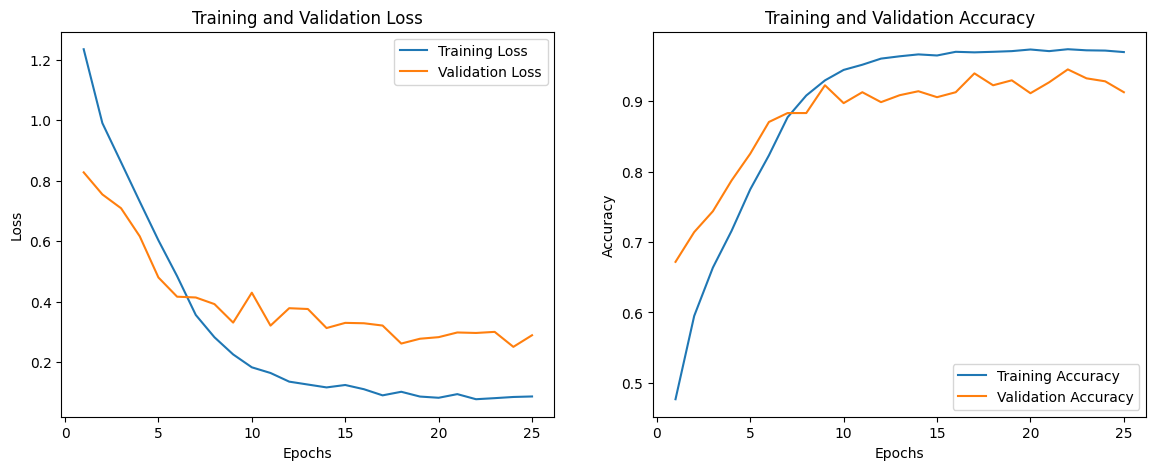

10/10 [==============================] - 6s 523ms/step - loss: 0.0779 - accuracy: 0.9741
Test Accuracy: 97.41%
10/10 [==============================] - 6s 546ms/step


NameError: name 'classification_report' is not defined

In [ ]:
# Step 3: Data Preparation
# Define the path to your dataset
train_dir = '/content/drive/My Drive/Diabetetic_Retino/preprocced/train'
val_dir = '/content/drive/My Drive/Diabetetic_Retino/preprocced/validation'
test_dir = '/content/drive/My Drive/Diabetetic_Retino/preprocced/test'

# Create ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')  # Set as training data

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')  # Set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Set as test data

# Get the number of samples for each class in training, validation, and testing
def get_class_distribution(generator):
    counter = np.zeros(len(generator.class_indices))
    for _, label_batch in generator:
        counter += np.sum(label_batch, axis=0)
        if generator.batch_index == 0:
            break
    return counter

train_class_distribution = get_class_distribution(train_generator)
val_class_distribution = get_class_distribution(val_generator)
test_class_distribution = get_class_distribution(test_generator)

# Print the number of images accessed from each class for each category
class_labels = list(train_generator.class_indices.keys())
print("Number of images in each class for training data:")
for label, count in zip(class_labels, train_class_distribution):
    print(f"{label}: {int(count)}")

print("\nNumber of images in each class for validation data:")
for label, count in zip(class_labels, val_class_distribution):
    print(f"{label}: {int(count)}")

print("\nNumber of images in each class for testing data:")
for label, count in zip(class_labels, test_class_distribution):
    print(f"{label}: {int(count)}")

# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Step 5: Train the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data=val_generator)

# Step 6: Plot Training & Validation Loss and Accuracy
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Step 7: Evaluate the Model
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Plot accuracy for each class
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)

# Extracting accuracy for each class
class_accuracies = {class_labels[i]: report[class_labels[i]]['precision'] for i in range(len(class_labels))}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy for each class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


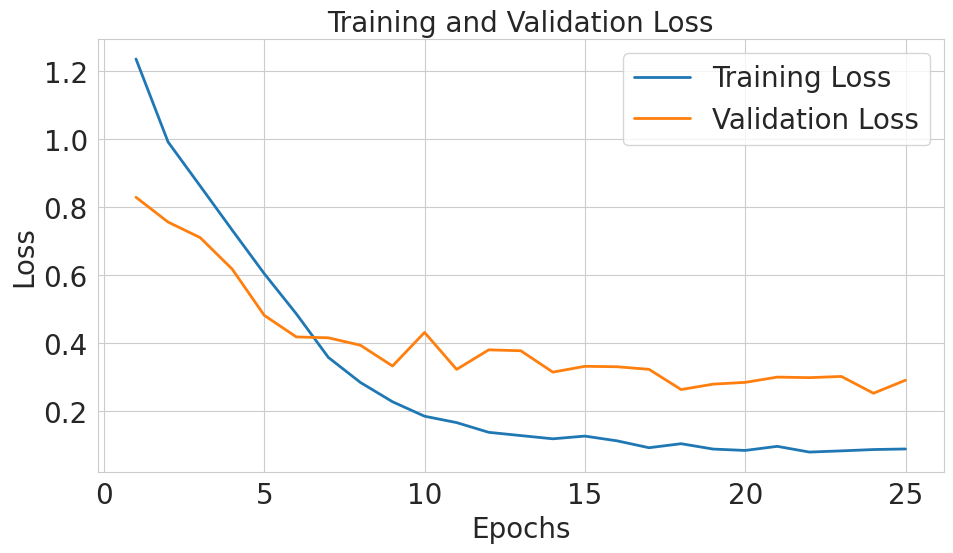

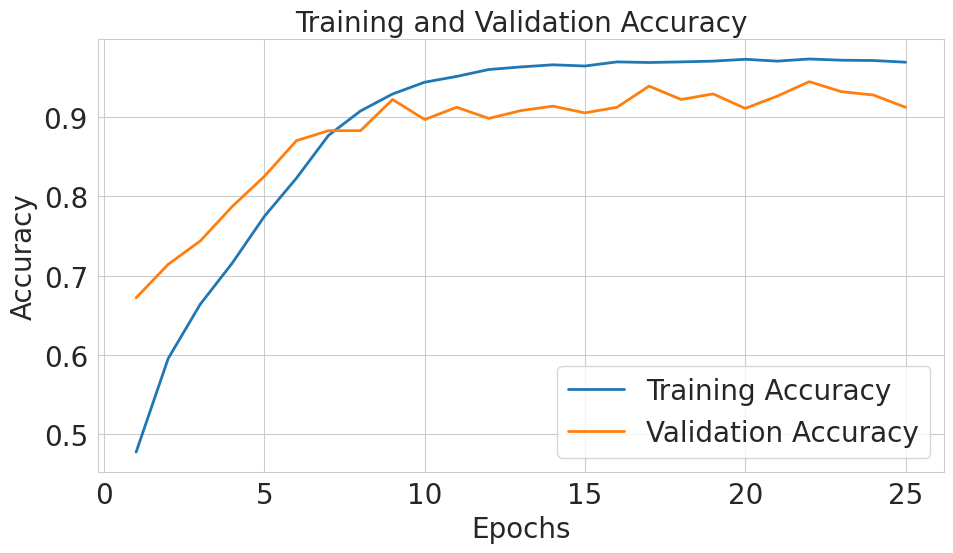

10/10 [==============================] - 7s 635ms/step - loss: 0.0779 - accuracy: 0.9741
Test Accuracy: 97.41%


In [ ]:
model.save('/content/drive/My Drive/Diabetetic_Retino/model/diabetic_retinopathy_cnn.h5')

# Step 6: Plot Training & Validation Loss and Accuracy
epochs = range(1, len(history.history['loss']) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Diabetetic_Retino/training_validation_loss_plot.png', dpi=400)
plt.show()


# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Diabetetic_Retino/training_validation_accuracy_plot.png', dpi=400)
plt.show()


# Step 7: Evaluate the Model
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

10/10 [==============================] - 9s 793ms/step


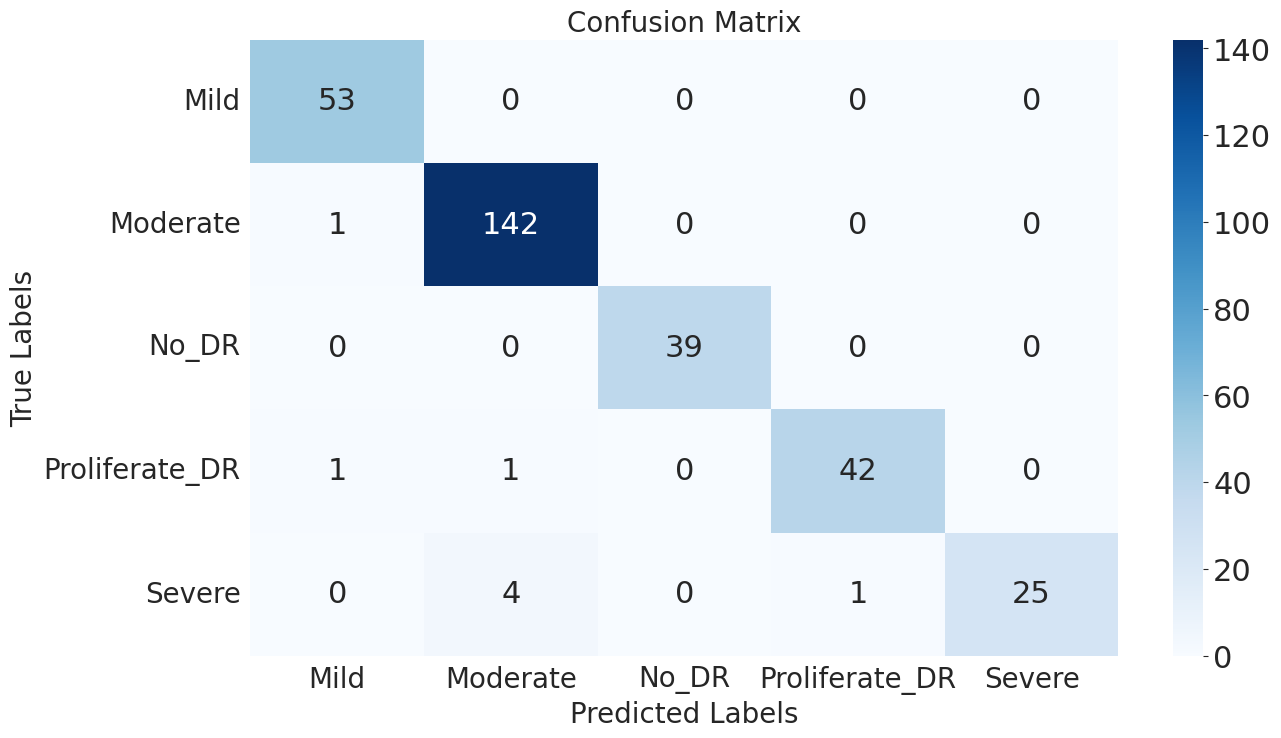

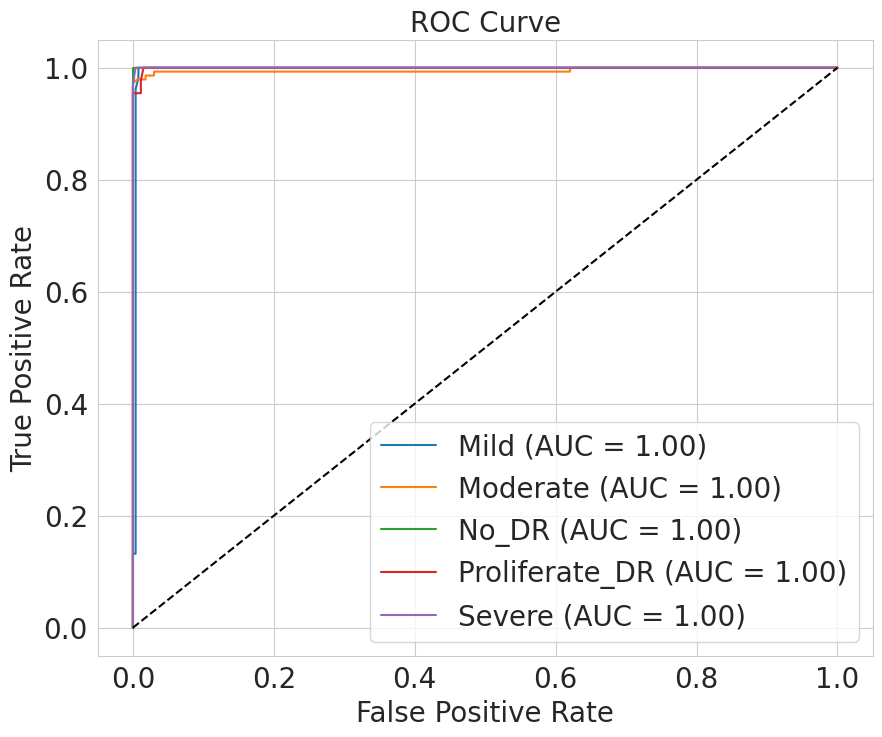

<ipython-input-21-ddb45db76e7c>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_accuracies.keys()), y=list(class_accuracies.values()), palette='viridis')


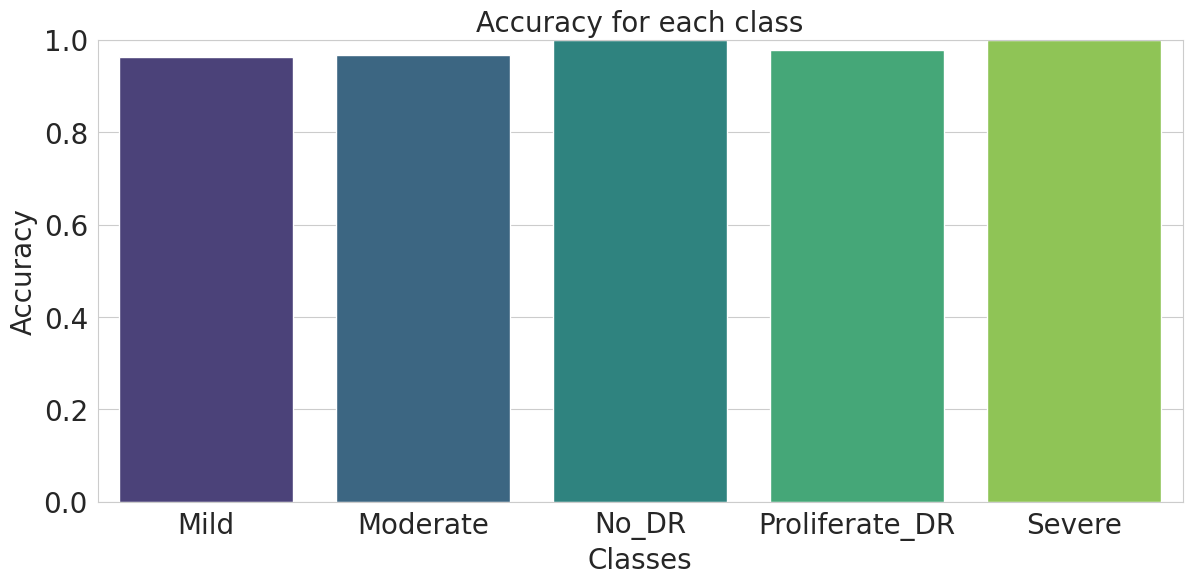

In [ ]:
# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import itertools
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 22})
# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Step 8: Plot Confusion Matrix
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(14, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Step 9: Plot ROC Curve
plt.figure(figsize=(10, 8))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Extract and plot accuracy for each class
report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
class_accuracies = {class_labels[i]: report[class_labels[i]]['precision'] for i in range(len(class_labels))}

plt.figure(figsize=(14, 6))
sns.barplot(x=list(class_accuracies.keys()), y=list(class_accuracies.values()), palette='viridis')
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy for each class', fontsize=20)
plt.xticks( fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1)
plt.show()

10/10 [==============================] - 9s 831ms/step - loss: 0.0779 - accuracy: 0.9741
Test Accuracy: 97.41%
10/10 [==============================] - 6s 522ms/step


<ipython-input-25-03ec7e1e2ba9>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=precision, palette='viridis')


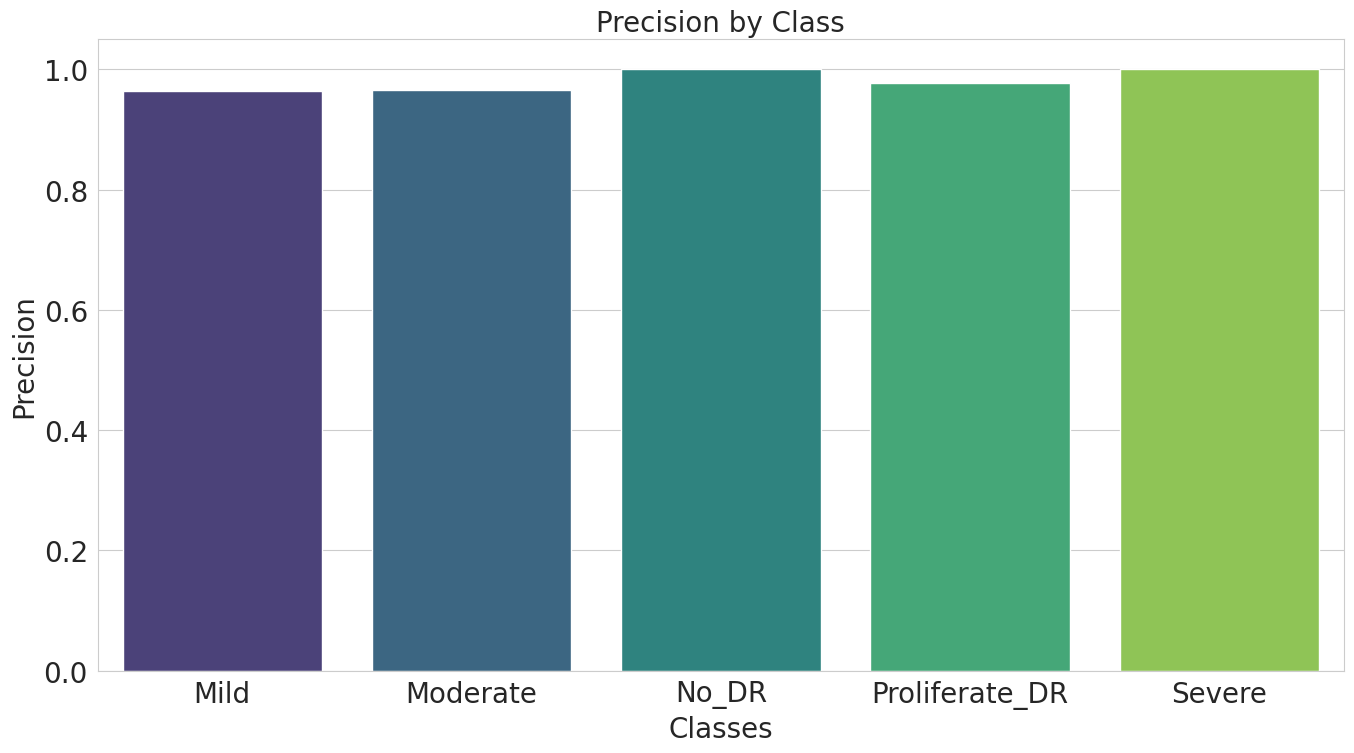

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-25-03ec7e1e2ba9>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=recall, palette='viridis')


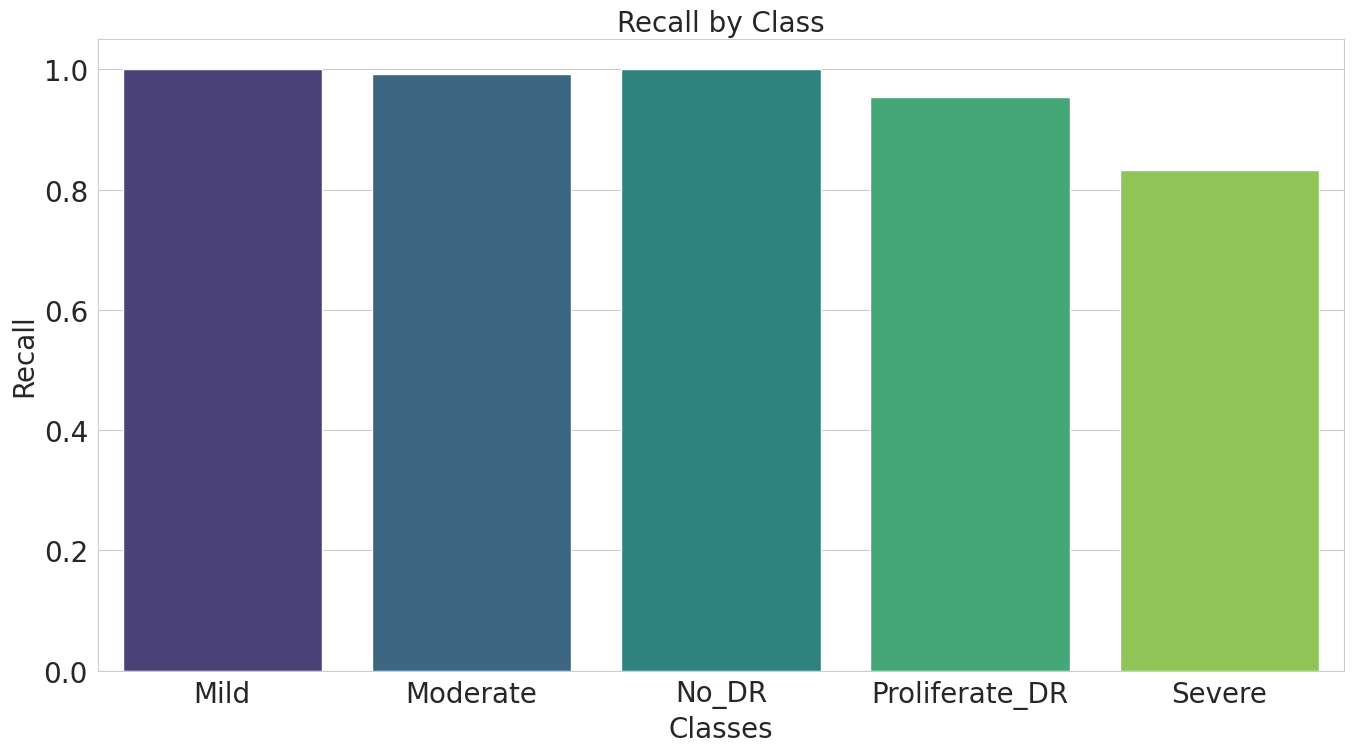

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-25-03ec7e1e2ba9>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=f1_score, palette='viridis')


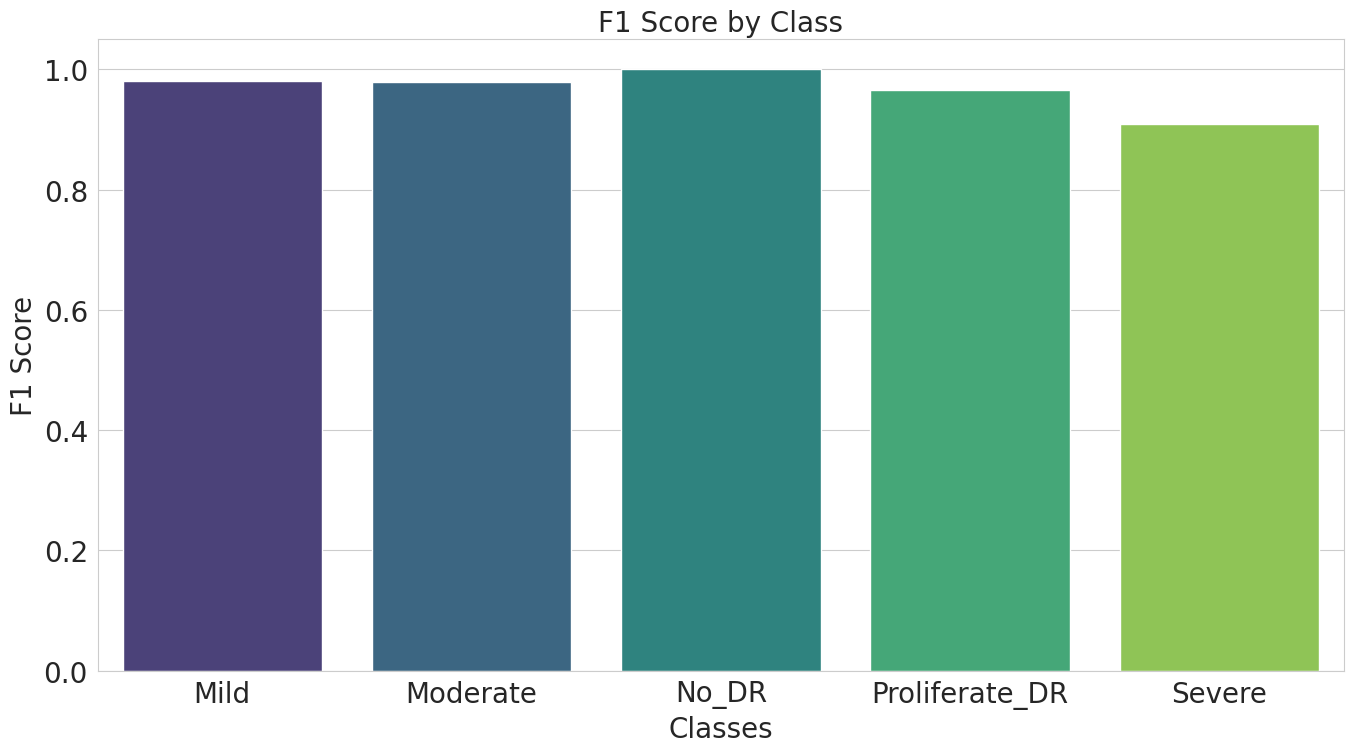

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
import seaborn as sns
import itertools
from google.colab import files

# Step 7: Evaluate the Model
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Step 8: Precision, Recall, and F1 Score
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Extracting precision, recall, and f1 score
metrics = precision_recall_fscore_support(y_true, y_pred_classes)
precision, recall, f1_score, _ = metrics

# Plot precision
plt.figure(figsize=(14, 8))
sns.barplot(x=class_labels, y=precision, palette='viridis')
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('Precision by Class', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Diabetetic_Retino/precision_plot.png', dpi=400)
plt.show()

# Download the plot
files.download('/content/drive/My Drive/Diabetetic_Retino/precision_plot.png')

# Plot recall
plt.figure(figsize=(14, 8))
sns.barplot(x=class_labels, y=recall, palette='viridis')
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Recall', fontsize=20)
plt.title('Recall by Class', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Diabetetic_Retino/recall_plot.png', dpi=400)
plt.show()

# Download the plot
files.download('/content/drive/My Drive/Diabetetic_Retino/recall_plot.png')

# Plot f1 score
plt.figure(figsize=(14, 8))
sns.barplot(x=class_labels, y=f1_score, palette='viridis')
plt.xlabel('Classes', fontsize=20)
plt.ylabel('F1 Score', fontsize=20)
plt.title('F1 Score by Class', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Diabetetic_Retino/f1_score_plot.png', dpi=400)
plt.show()

# Download the plot
files.download('/content/drive/My Drive/Diabetetic_Retino/f1_score_plot.png')


In [ ]:
# Print precision, recall, and f1-score
print("\nPrecision, Recall, and F1-Score for each class:")
for i, label in enumerate(class_labels):
    print(f"{label}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  F1-Score: {f1_score[i]:.2f}")


Precision, Recall, and F1-Score for each class:
Mild:
  Precision: 0.96
  Recall: 1.00
  F1-Score: 0.98
Moderate:
  Precision: 0.97
  Recall: 0.99
  F1-Score: 0.98
No_DR:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
Proliferate_DR:
  Precision: 0.98
  Recall: 0.95
  F1-Score: 0.97
Severe:
  Precision: 1.00
  Recall: 0.83
  F1-Score: 0.91


In [ ]:
# Print model attributes and hyperparameters
print("\nModel Attributes and Hyperparameters:")
print(f"Number of layers: {len(model.layers)}")
for i, layer in enumerate(model.layers):
    print(f"Layer {i + 1}: {layer.name}")
    print(f"  Input shape: {layer.input_shape}")
    print(f"  Output shape: {layer.output_shape}")
    print(f"  Number of parameters: {layer.count_params()}")


Model Attributes and Hyperparameters:
Number of layers: 10
Layer 1: conv2d
  Input shape: (None, 150, 150, 3)
  Output shape: (None, 148, 148, 32)
  Number of parameters: 896
Layer 2: max_pooling2d
  Input shape: (None, 148, 148, 32)
  Output shape: (None, 74, 74, 32)
  Number of parameters: 0
Layer 3: conv2d_1
  Input shape: (None, 74, 74, 32)
  Output shape: (None, 72, 72, 64)
  Number of parameters: 18496
Layer 4: max_pooling2d_1
  Input shape: (None, 72, 72, 64)
  Output shape: (None, 36, 36, 64)
  Number of parameters: 0
Layer 5: conv2d_2
  Input shape: (None, 36, 36, 64)
  Output shape: (None, 34, 34, 128)
  Number of parameters: 73856
Layer 6: max_pooling2d_2
  Input shape: (None, 34, 34, 128)
  Output shape: (None, 17, 17, 128)
  Number of parameters: 0
Layer 7: flatten
  Input shape: (None, 17, 17, 128)
  Output shape: (None, 36992)
  Number of parameters: 0
Layer 8: dense
  Input shape: (None, 36992)
  Output shape: (None, 512)
  Number of parameters: 18940416
Layer 9: dropo